# The Multilayer-Perceptron

The Perceptron and Adaline algorithms are characterized by generating a **direct mapping between input and output patterns**. Such characteristic is a direct result of their **single-layer architecture**. With one layer, there is no place to create **intermediate representations** of the inputs before mapping into the outputs. The idea of generating internal representations of the entities from the outside world is a core notion in cognitive science. It is what differentiates cognitive science from old-school behaviorism: the mind and the brain must do some form of internal processing and reorganization of the information obtained from the environment, that allows things like reasoning, lenaguage, and complex thinking and behavior more generally. Hence, it is just logical that a single-layer Perceptron or Adaline could not recreate many human cognitive capacities. As a matter of fact, Marvin Minsky and Seymour Papert devoted an entire book (‘Perceptrons’, 1969) to show the many limitations of Perceptrons as learning algorithms.  One of the classical examples of the limitations of the Perceptron and Adaline is the **exclusive-or (XOR) problem** illustrated in the table below: 

<center>Table 1</center>

| Input patterns | -> | Output Patterns |
|----------------|----|-----------------|
| 00             | -> | 0               |
| 01             | -> | 1               |
| 10             | -> | 1               |
| 11             | -> | 0               |

The XOR problem seems to be a trivially easy problem to solve for humans: when the input patterns are the same, output 1; when they are different, output 0. There is a simple graphical way to show why a Perceptron can’t learn to solve such a simple problem as showed in the Figure below.

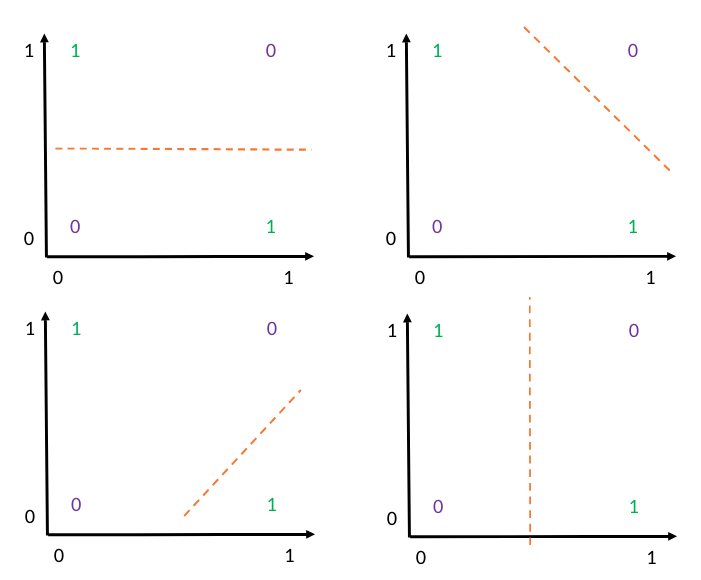

In [4]:
from IPython.display import Image
i = Image(filename='../figures/images/XOR_linear.png')
display(i)

The X and Y axis reflect the combination of binary features in the XOR problem (0 or 1). When X = Y = 0, the output is 0, when X = 1 and Y = 0, the output is 1, and so forth. The dashed orange line represents the decision boundary created by the Perceptron. As you can see, there is no way to create a decision boundary capable of classifying all the instances correctly (you can keep trying all possible straight lines, and won't work). There are two possible approaches to takle this issue: (1) **changing the representation of the problem**, this is to say, generating some sort of transformation of the inputs into a space that is linearly separable, or (2) using a model that is not restricted to linear decision boundaries, i.e., **allowing for non-linearities in the model**. 

Since changing the representation of a problem involves some form of transformation of the inputs, an intuitive first step may be just to modify the input features by hand. For instance, we could try a coding scheme like the one in **Table 2**. In such case, we are adding a third dimension that actually allows to separate the the '1' and '0' with a plane (linear model). Yet, this seems to be a very unsatisfactory solution since requires **hand-crafting features** which **doesn't not generalize** well beyond toy problems. 

<center>Table 2</center>

| Input patterns  | -> | Output Patterns |
|-----------------|----|-----------------|
| 000             | -> | 0               |
| 010             | -> | 1               |
| 100             | -> | 1               |
| 111             | -> | 0               |

A second idea may be just adding more layers to the Perceptron. Unfortunately, **no matter how many layers we add, the output of a linear model, is a linear decision boundary**. Therefore, that is not a viable solution. A combination of adding more layers and allowing for non-linearities in the model seems to be the way to go, and that was precisely what Rumelhart, Hinton and Williams did in 1985.

## A new generation of artificial neural networks

In [ ]:
# TODO: expand on Rumelhart, Hinton, and Williams

## Formal definition of the multilayer perceptron with non-linear units

In [ ]:
#TODO

## Learning algorithm

In [6]:
# TODO

## Multilayer perceptron implementation

In [ ]:
# TODO: 
# - create a function to generate training data for XOR problem
# - plot the training data
# - set up keras model 
# - train and test keras model
# - compute metrics

In [5]:
import numpy as np

In [6]:
# Define function to create figures type
def figure_type(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    '''creates [n_sampes, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2])
    X = X.transpose()
    y = np.full((n_samples), target)
    return X, y

In [7]:
# create tall-figures matrix
T, y_t = figure_type(10, 2, 5, 1, 100, 1, 1)
nl = '\n'
print(f'Feature matrix shape: {T.shape} {nl}target vector shape: {y_t.shape}')
print(f'Feature matrix: {nl}{T[0:4, :]} {nl}target vector: {nl}{y_t[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[13.24869073  4.55287144]
 [ 8.77648717  6.2245077 ]
 [ 8.9436565   5.40349164]
 [ 7.85406276  5.59357852]] 
target vector: 
[1 1 1 1]


In [8]:
# create wide-figures matrix
W, y_w = figure_type(5, 1, 10, 2, 100, -1, 2)
nl = '\n'
print(f'Feature matrix shape: {W.shape} {nl}target vector shape: {y_w.shape}')
print(f'Feature matrix: {nl}{W[0:4, :]} {nl}target vector: {nl}{y_w[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[ 4.58324215 12.32304298]
 [ 4.94373317 10.7721561 ]
 [ 2.8638039   7.73373345]
 [ 6.64027081 10.86618511]] 
target vector: 
[-1 -1 -1 -1]


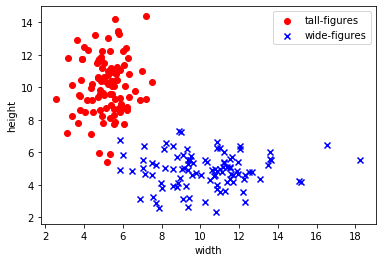

In [10]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = np.concatenate((T, W), axis=0)
y = np.concatenate((y_t, y_w), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True)

In [12]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (140, 2)
y_train.shape: (140,)
X_test.shape: (60, 2)
y_test.shape: (60,)


In [13]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(2, input_dim=2, kernel_initializer='random_uniform'))
model.add(Dense(2, kernel_initializer='random_uniform'))
model.add(Activation('relu')) # create custom activation function here

In [2]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.
